In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv(r"C:\Users\niyat\OneDrive\Desktop\Data-Handling\titanic.csv")


In [5]:
df = pd.read_csv("titanic.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

In [8]:
import os
print(os.getcwd())


C:\Users\niyat


In [11]:
import shutil

source = r"C:\Users\niyat\titanic.csv.ipynb"
destination = r"C:\Users\niyat\OneDrive\Desktop\Data-Handling\titanic.csv.ipynb"

shutil.move(source, destination)


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [12]:
import pandas as pd

df = pd.read_csv(r"C:\Users\niyat\OneDrive\Desktop\Data-Handling\titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Convert 'Sex' to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop rows with any remaining nulls
df.dropna(inplace=True)


In [16]:
X = df[['Pclass', 'Sex', 'Age']]
y = df['Survived']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [19]:
print(df.shape)
print(X.shape)
print(y.shape)


(0, 12)
(0, 3)
(0,)


In [20]:
df = pd.read_csv(r"C:\Users\niyat\OneDrive\Desktop\Data-Handling\titanic.csv")

# Keep only the needed columns for modeling
df = df[['Pclass', 'Sex', 'Age', 'Survived']]

# Convert Sex to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Handle missing Age values only
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop any row with missing Pclass, Sex, Age, or Survived (should be rare now)
df.dropna(inplace=True)


In [21]:
X = df[['Pclass', 'Sex', 'Age']]
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
print(df.shape)


(891, 4)


In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877

Confusion Matrix:
 [[91 14]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



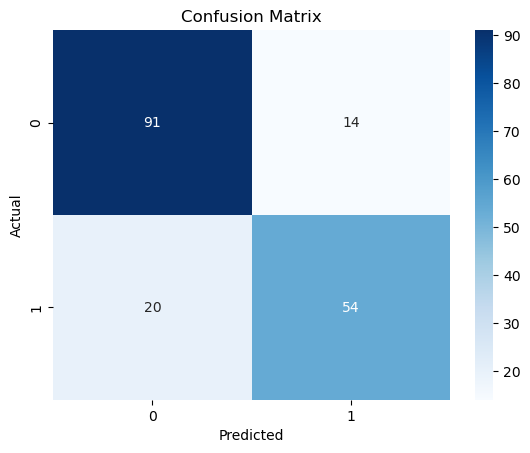

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
